# T<sub>2</sub> Ramsey Characterization

The purpose of the $T_2$Ramsey experiment is to determine two of the qubit's properties: *Ramsey* or *detuning frequency* and $T_2^\ast$. The rough frequency of the qubit was already determined previously. The control pulses are based on this frequency. 

In this experiment, we would like to get a more precise estimate of the qubit's frequency. The difference between the frequency used for the control rotation pulses, and the precise frequency is called the *detuning frequency*. This part of the experiment is called a *Ramsey Experiment*. $T_2^\ast$ represents the rate of decay toward a mixed state, when the qubit is initialized to the $\left|1\right\rangle$ state.

Since the detuning frequency is relatively small, we add a phase gate to the circuit to enable better measurement. The actual frequency measured is the sum of the detuning frequency and the user induced *oscillation frequency* (`osc_freq` parameter).

In [1]:
import qiskit
from qiskit_experiments.library import T2Ramsey

The circuit used for the experiment comprises the following:

    1. Hadamard gate
    2. delay
    3. RZ gate that rotates the qubit in the x-y plane 
    4. Hadamard gate
    5. measurement

The user provides as input a series of delays and the time unit for the delays, e.g., seconds, milliseconds, etc. In addition, the user provides the oscillation frequency in Hz. During the delay, we expect the qubit to precess about the z-axis. If the p gate and the precession offset each other perfectly, then the qubit will arrive at the $\left|0\right\rangle$ state (after the second Hadamard gate). By varying the extension of the delays, we get a series of oscillations of the qubit state between the $\left|0\right\rangle$ and $\left|1\right\rangle$ states. We can draw the graph of the resulting function, and can analytically extract the desired values.

In [2]:
# set the computation units to microseconds
unit = "us"  # microseconds
qubit = 0
# set the desired delays
delays = list(range(1, 50, 1))

We run the experiment on a simple, simulated backend, created specifically for this experiment's tutorial.

In [3]:
from qiskit_experiments.test.t2ramsey_backend import T2RamseyBackend
# FakeJob is a wrapper for the backend, to give it the form of a job
from qiskit_experiments.test.utils import FakeJob

conversion_factor = 1e-6
# The behavior of the backend is determined by the following parameters
backend = T2RamseyBackend(
    p0={
        "A": [0.5],
        "T2star": [20.0],
        "f": [100100],
        "phi": [0.0],
        "B": [0.5],
    },
    initial_prob_plus=[0.0],
    readout0to1=[0.02],
    readout1to0=[0.02],
    conversion_factor=conversion_factor,
)

In [4]:
# Create a T2Ramsey experiment. Print the first circuit as an example
exp1 = T2Ramsey(qubit, delays, backend=backend, unit=unit, osc_freq=1e5)
print(exp1.circuits()[0])

     ┌───┐┌─────────────────┐┌─────────┐ ░ ┌───┐ ░ ┌─┐
  q: ┤ H ├┤ Delay(1e-06[s]) ├┤ Rz(π/5) ├─░─┤ H ├─░─┤M├
     └───┘└─────────────────┘└─────────┘ ░ └───┘ ░ └╥┘
c: 1/═══════════════════════════════════════════════╩═
                                                    0 


The resulting graph will have the form:
$f(t) = a^{-t/T_2*} \cdot \cos(2 \pi f t + \phi) + b$
where *t* is the delay, $T_2^\ast$ is the decay factor, and *f* is the detuning frequency.
`conversion_factor` is a scaling factor that depends on the measurement units used. It is 1E-6 here, because the unit is microseconds.

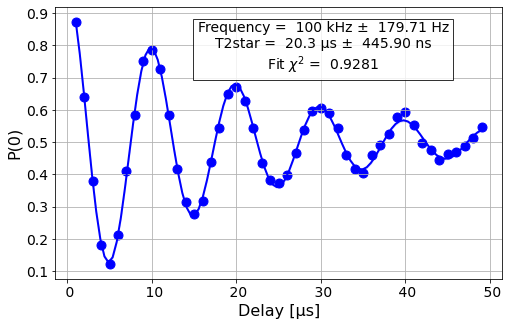

In [5]:
expdata1 = exp1.run(shots=2000)
expdata1.block_for_results()  # Wait for job/analysis to finish.

# Display the figure
display(expdata1.figure(0))

In [6]:
# Print results
for result in expdata1.analysis_results():
    print(result)

DbAnalysisResultV1
- name: @Parameters_T2RamseyAnalysis
- value: [0.47661271938997857, 0.5009299850472254, 2.027233251779913e-05, 100413.99075208679, -0.023345261806477162]
- χ²: 0.9281334491945361
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 100413.99075208679 ± 179.70932197402607 Hz
- χ²: 0.9281334491945361
- quality: good
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: T2star
- value: 2.027233251779913e-05 ± 4.459026898356417e-07 s
- χ²: 0.9281334491945361
- quality: good
- device_components: ['Q0']
- verified: False


Additional fitter result data is stored in the `result.extra` field

In [7]:
expdata1.analysis_results("T2star").extra

{}

### Providing initial user estimates
The user can provide initial estimates for the parameters to help the analysis process. Because the curve is expected to decay toward $0.5$, the natural choice for parameters $A$ and $B$ is $0.5$. Varying the value of $\phi$ will shift the graph along the x-axis. Since this is not of interest to us, we can safely initialize $\phi$ to 0. In this experiment, `t2ramsey` and `f` are the parameters of interest. Good estimates for them are values computed in previous experiments on this qubit or a similar values computed for other qubits.

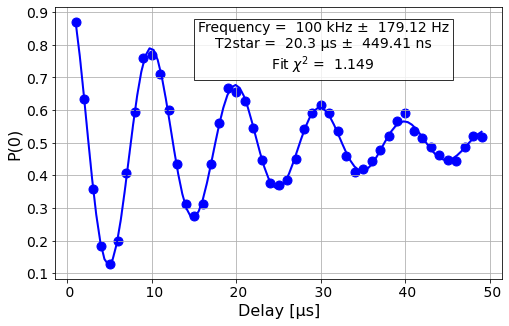

In [8]:
from qiskit_experiments.library.characterization import T2RamseyAnalysis
user_p0={
    "A": 0.5,
    "T2star": 20.0,
    "f": 110000,
    "phi": 0,
    "B": 0.5
        }
exp_with_p0 = T2Ramsey(qubit, delays, unit=unit, osc_freq=1e5)
exp_with_p0.set_analysis_options(p0=user_p0)
expdata_with_p0 = exp_with_p0.run(backend=backend, shots=2000)
expdata_with_p0.block_for_results()

# Display fit figure
display(expdata_with_p0.figure(0))

In [9]:
# Print results
for result in expdata_with_p0.analysis_results():
    print(result)

DbAnalysisResultV1
- name: @Parameters_T2RamseyAnalysis
- value: [0.4758259887081217, 0.49883027603886587, 2.0302802760054184e-05, 100060.40658245387, -0.005012061568524107]
- χ²: 1.1489680771911912
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 100060.40658245387 ± 179.11574022465186 Hz
- χ²: 1.1489680771911912
- quality: good
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: T2star
- value: 2.0302802760054184e-05 ± 4.494130533795633e-07 s
- χ²: 1.1489680771911912
- quality: good
- device_components: ['Q0']
- verified: False


The units can be changed, but the output in the result is always given in seconds. The units in the backend must be adjusted accordingly.

In [10]:
from qiskit.utils import apply_prefix

unit = "ns"
delays = list(range(1000, 50000, 1000))
conversion_factor = apply_prefix(1, unit)
print(conversion_factor)

1e-09


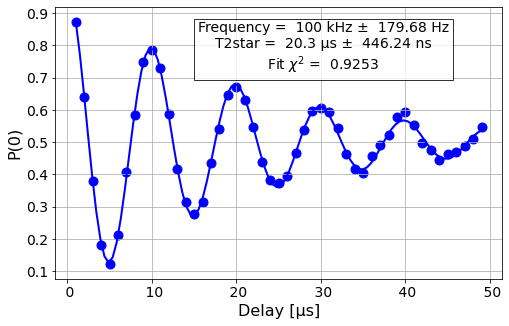

In [11]:
p0 = {
    "A": [0.5],
    "T2star": [20000],
    "f": [100000],
    "phi": [0.0],
    "B": [0.5],
}
backend_in_ns = T2RamseyBackend(
    p0=p0,
    initial_prob_plus=[0.0],
    readout0to1=[0.02],
    readout1to0=[0.02],
    conversion_factor=conversion_factor,
)
exp_in_ns = T2Ramsey(qubit, delays, unit=unit, osc_freq=1e5)
user_p0_ns = {
    "A": 0.5,
    "T2star": 20000.0,
    "f": 110000,
    "phi": 0,
    "B": 0.5
}
exp_in_ns.set_analysis_options(p0=user_p0_ns)

# Run experiment
expdata_in_ns = exp_in_ns.run(backend=backend_in_ns, shots=2000).block_for_results()

# Display Figure
display(expdata_in_ns.figure(0))

In [12]:
# Print Results
for result in expdata_in_ns.analysis_results():
    print(result)

DbAnalysisResultV1
- name: @Parameters_T2RamseyAnalysis
- value: [0.47647159826504665, 0.5008134416043298, 2.0278573107576978e-05, 100324.87066739006, -0.024383808868937668]
- χ²: 0.9253222023846028
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 100324.87066739006 ± 179.6802356926237 Hz
- χ²: 0.9253222023846028
- quality: good
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: T2star
- value: 2.0278573107576978e-05 ± 4.4624069191955704e-07 s
- χ²: 0.9253222023846028
- quality: good
- device_components: ['Q0']
- verified: False


In [13]:
import qiskit.tools.jupyter
%qiskit_copyright